In [103]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D,BatchNormalization,Flatten,Resizing,Rescaling,InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [104]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.cifar10.load_data()

In [105]:
classes=["airplanes", "cars", "birds", "cats", "deer", "dogs", "frogs", "horses", "ships", "trucks"]
classes[int(ytrain[0])]

'frogs'

In [106]:
(xtrain.shape),(ytrain.shape),(xtest.shape),(ytest.shape)

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

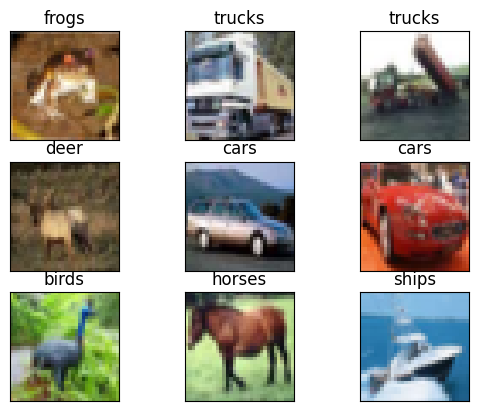

In [107]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(xtrain[i])
  plt.title(classes[int(ytrain[i])])
  plt.xticks([])
  plt.yticks([])

In [108]:
ytrain = to_categorical(ytrain,10)
ytest = to_categorical(ytest,10)

# xtrain = tf.image.grayscale_to_rgb(tf.expand_dims(xtrain, axis=-1))
# xtest  = tf.image.grayscale_to_rgb(tf.expand_dims(xtest, axis=-1))


xtrain, xtest = xtrain / 255.0, xtest / 255.0

In [109]:
model=tf.keras.Sequential([
    InputLayer(input_shape=(None,None,3)),

    Resizing(28,28),
    Rescaling(1/225),


    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    # Conv2D(42,(3,3),activation='relu'),
    # MaxPooling2D((2,2)),
    # BatchNormalization(),

    Flatten(),

    Dense(100,activation='relu'),
    Dense(50,activation='relu'),
    Dense(10,activation='softmax'),

])

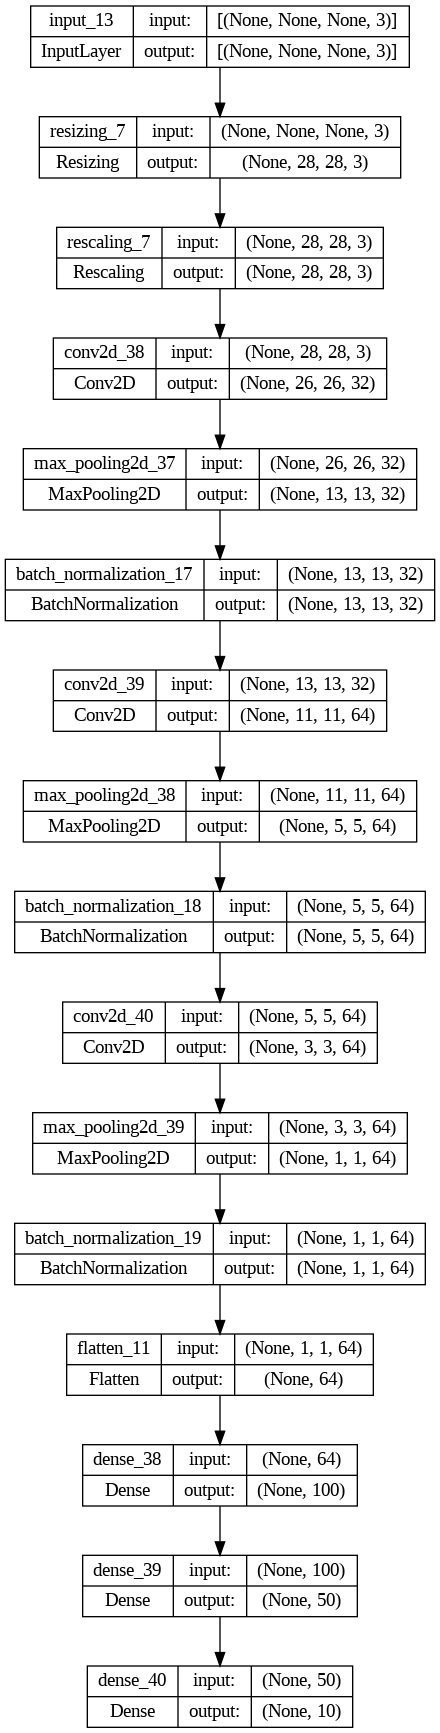

In [110]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [111]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics='accuracy')

In [112]:
model.fit(xtrain,ytrain,epochs=2)

Epoch 1/2
1563/1563 [==============================] - 53s 33ms/step - loss: 1.5819 - accuracy: 0.4268
Epoch 2/2
1563/1563 [==============================] - 49s 32ms/step - loss: 1.3069 - accuracy: 0.5348


In [113]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 3s 9ms/step - loss: 1.7355 - accuracy: 0.3806


[1.7355287075042725, 0.3806000053882599]

In [115]:

a=model.predict( tf.expand_dims(xtest[0],axis=0) )
classes[np.argmax(a)]

1/1 [==============================] - 0s 20ms/step


'dogs'

In [ ]:
for i in range(9):

In [135]:

Output=[]
for i in range(25):
    a=model.predict( tf.expand_dims(xtest[i],axis=0) )
    B=classes[np.argmax(a)]
    Output.append(B)

1/1 [==============================] - 0s 20ms/step


In [136]:
Output

['dogs',
 'cars',
 'ships',
 'airplanes',
 'birds',
 'cats',
 'cars',
 'birds',
 'birds',
 'cars',
 'birds',
 'trucks',
 'dogs',
 'dogs',
 'cars',
 'birds',
 'dogs',
 'dogs',
 'ships',
 'frogs',
 'horses',
 'birds',
 'birds',
 'horses',
 'birds']

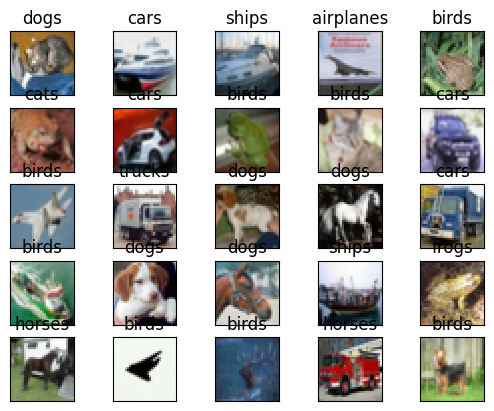

In [138]:
for i in range(25):
   plt.subplot(5,5,i+1)
   plt.imshow(xtest[i])
   plt.title(Output[i])
   plt.xticks([])
   plt.yticks([])